In [844]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [845]:
pd.set_option('display.max_rows', 999)

In [846]:
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv')
title_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv')
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv')
title_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv')
title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv')

In [847]:
import warnings
warnings.filterwarnings('ignore')

# IMDB Name Basics

In [848]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [849]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [850]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

# Removing the deceased

In [851]:
name_basics = name_basics[(name_basics['death_year'].isna())]
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [852]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523401
death_year            599865
primary_profession     50548
known_for_titles       30099
dtype: int64

In [853]:
name_basics['directors'] = name_basics['nconst']
name_basics['writers'] = name_basics['nconst']

In [854]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898",nm0062070,nm0062070
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",nm0062195,nm0062195
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256",nm0062798,nm0062798
...,...,...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN,nm9990381,nm9990381
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",nm9990690,nm9990690
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",nm9991320,nm9991320
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN,nm9991786,nm9991786


# IMDB Title AKAS

In [855]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [856]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [857]:
title_akas.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

# Renaming first column to match for merge

In [858]:
title_akas.rename(columns = {'title_id':'tconst'},inplace=True)

In [859]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


# IMDB Title Basics

In [860]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [861]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [862]:
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

# Replacing the runtime_minutes with the mean of the column since we're only missing 20% of our data

In [863]:
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(), inplace=True)

In [864]:
title_basics.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

# IMDB Title Crew

In [865]:
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [866]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [867]:
title_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

# IMDB Title Principals

In [868]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [869]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [870]:
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

# IMDB Title Ratings

In [871]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [872]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [873]:
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

# Merging all tables

In [874]:
name_principals = pd.merge(name_basics, title_principals, on='nconst')
name_principals

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers,tconst,ordering,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671,tt2398241,9,producer,producer,NaN
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt0433397,7,composer,NaN,NaN
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt1681372,8,composer,NaN,NaN
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt2387710,8,composer,NaN,NaN
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt2281215,7,composer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016064,nm9990381,Susan Grobes,NaN,NaN,actress,NaN,nm9990381,nm9990381,tt6527982,2,actress,NaN,"[""Cheryl"",""Gypsy""]"
1016065,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",nm9990690,nm9990690,tt8737130,4,actress,NaN,NaN
1016066,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",nm9991320,nm9991320,tt8734436,3,actress,NaN,"[""Anna""]"
1016067,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN,nm9991786,nm9991786,tt8739240,9,producer,producer,NaN


In [875]:
name_principals_ratings = pd.merge(name_principals, title_ratings, on='tconst')
name_principals_ratings

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers,tconst,ordering,category,job,characters,averagerating,numvotes
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671,tt2398241,9,producer,producer,NaN,6.0,15612
1,nm0038432,Kelly Asbury,1960.0,NaN,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",nm0038432,nm0038432,tt2398241,5,director,NaN,NaN,6.0,15612
2,nm0449549,Jordan Kerner,NaN,NaN,"producer,actor,executive","tt0101921,tt0141369,tt0119190,tt0108333",nm0449549,nm0449549,tt2398241,10,producer,producer,NaN,6.0,15612
3,nm0962596,Pamela Ribon,1975.0,NaN,"writer,producer,actress","tt0898332,tt3521164,tt5848272,tt2458776",nm0962596,nm0962596,tt2398241,7,writer,written by,NaN,6.0,15612
4,nm0542133,Joe Manganiello,1976.0,NaN,"actor,stunts,producer","tt0974015,tt2268016,tt0844441,tt0837156",nm0542133,nm0542133,tt2398241,3,actor,NaN,"[""Hefty Smurf""]",6.0,15612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,nm8482246,Marco Niemeijer,NaN,NaN,"director,writer,cinematographer","tt7708926,tt5132170",nm8482246,nm8482246,tt7708926,1,director,NaN,NaN,7.0,9
621362,nm6870672,Sandy Ding,NaN,NaN,"director,writer,producer","tt6441144,tt4150214,tt5918088",nm6870672,nm6870672,tt5918088,1,director,NaN,NaN,7.5,20
621363,nm6930231,Park Bum-Soo,NaN,NaN,"director,writer","tt4219354,tt4773564",nm6930231,nm6930231,tt4773564,1,director,NaN,NaN,5.6,7
621364,nm8481580,Aleksey Bystritskiy,NaN,NaN,director,"tt6112166,tt7424890",nm8481580,nm8481580,tt6112166,1,director,NaN,NaN,4.8,5


In [876]:
name_principals_ratings_crew = pd.merge(title_crew, name_principals_ratings, on='tconst')
name_principals_ratings_crew

,tconst,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering,category,job,characters,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,nm0120025,Kim Bullard,NaN,NaN,"composer,soundtrack,music_department","tt0147800,tt0117865,tt0372588,tt8889506",nm0120025,nm0120025,9,composer,NaN,NaN,3.9,219
1,tt0285252,nm0899854,nm0899854,nm0000686,Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",nm0000686,nm0000686,3,actor,NaN,"[""Roy Callahan""]",3.9,219
2,tt0285252,nm0899854,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",nm0899854,nm0899854,5,director,NaN,NaN,3.9,219
3,tt0285252,nm0899854,nm0899854,nm0001822,Robert Wagner,1930.0,NaN,"actor,producer,soundtrack","tt0072308,tt0118655,tt0295178,tt0106770",nm0001822,nm0001822,4,actor,NaN,"[""Tom Wald""]",3.9,219
4,tt0285252,nm0899854,nm0899854,nm0009272,Richard Gilbert Abramson,NaN,NaN,"producer,director","tt0096926,tt0114658,tt0090500,tt0089791",nm0009272,nm0009272,6,producer,producer,NaN,3.9,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,tt9004986,nm4993825,nm4993825,nm1145570,John Erik Kaada,1975.0,NaN,"composer,music_department,soundtrack","tt3202392,tt3650484,tt3346824,tt1153110",nm1145570,nm1145570,7,composer,NaN,NaN,8.4,7
621362,tt9004986,nm4993825,nm4993825,nm4993825,Fredrik Horn Akselsen,NaN,NaN,"director,writer,assistant_director","tt2368989,tt9737848,tt9004986,tt4517204",nm4993825,nm4993825,5,director,NaN,NaN,8.4,7
621363,tt9004986,nm4993825,nm4993825,nm6197807,Torstein Nodland,NaN,NaN,"cinematographer,camera_department","tt9004986,tt8571630,tt3447810,tt9737848",nm6197807,nm6197807,9,cinematographer,NaN,NaN,8.4,7
621364,tt9004986,nm4993825,nm4993825,nm6450115,Thomas Kjær Olsen,NaN,NaN,actor,tt3688926,nm6450115,nm6450115,3,actor,NaN,"[""Young Mads Ousdal""]",8.4,7


In [877]:
name_principals_ratings_crew_basics = pd.merge(title_basics, name_principals_ratings_crew, on='tconst')
name_principals_ratings_crew_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering,category,job,characters,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0347899,Gulzar,1936.0,NaN,"music_department,writer,soundtrack","tt0091256,tt0178186,tt1010048,tt2176013",nm0347899,nm0347899,8,writer,dialogue,NaN,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0904537,Vyjayanthimala,1933.0,NaN,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547",nm0904537,nm0904537,2,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0474801,Dilip Kumar,1922.0,NaN,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667",nm0474801,nm0474801,1,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm1391276,Anjana Rawail,NaN,NaN,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540",nm1391276,nm1391276,9,writer,screenplay,NaN,7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN,nm0451809,Arun Khopkar,1945.0,NaN,"director,actor,assistant_director","tt0231382,tt0231583,tt0232192,tt3693912",nm0451809,nm0451809,2,actor,NaN,"[""Kalidasa""]",7.2,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm4241788,Tobias Borkert,NaN,NaN,"composer,music_department","tt8129666,tt6264034,tt1641810,tt4653186",nm4241788,nm4241788,4,composer,NaN,NaN,6.5,11
621362,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm3256778,Tom Denoyette,NaN,NaN,"editor,editorial_department","tt1625150,tt7431570,tt5492502,tt2878178",nm3256778,nm3256778,6,editor,NaN,NaN,6.5,11
621363,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm6969694,Rogier Timmermans,NaN,NaN,"cinematographer,camera_department","tt4160582,tt7941300",nm6969694,nm6969694,5,cinematographer,NaN,NaN,6.5,11
621364,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm6460816,Nils Leidal,NaN,NaN,NaN,tt3698384,nm6460816,nm6460816,1,self,NaN,"[""Himself""]",6.5,11


# Final Table Merge

In [878]:
pd.set_option('display.max_columns', 500)

In [879]:
final_merge = pd.merge(title_akas, name_principals_ratings_crew_basics, on='tconst')
final_merge

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380443,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5282266,Mugi Kadowaki,NaN,NaN,actress,"tt3108170,tt4651928,tt9827784,tt8764582",nm5282266,nm5282266,1,actress,NaN,"[""Haru""]",7.7,6
2380444,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5862455,Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158",nm5862455,nm5862455,2,actress,NaN,"[""Reo""]",7.7,6
2380445,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm4869921,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172",nm4869921,nm4869921,10,actor,NaN,NaN,7.7,6
2380446,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm6954008,Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044",nm6954008,nm6954008,3,actor,NaN,"[""Shima""]",7.7,6


# Final Merge Clean Up

In [880]:
final_merge.drop('ordering_y', 1, inplace=True)
final_merge.drop('writers_y', 1, inplace=True)
final_merge.drop('directors_y', 1, inplace=True)
final_merge

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",actress,NaN,"[""Karen""]",7.0,539338
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",actor,NaN,"[""Owen""]",7.0,539338
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",actress,NaN,"[""Claire""]",7.0,539338
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",writer,screenplay by,NaN,7.0,539338
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",director,NaN,NaN,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380443,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5282266,Mugi Kadowaki,NaN,NaN,actress,"tt3108170,tt4651928,tt9827784,tt8764582",actress,NaN,"[""Haru""]",7.7,6
2380444,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5862455,Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158",actress,NaN,"[""Reo""]",7.7,6
2380445,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm4869921,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172",actor,NaN,NaN,7.7,6
2380446,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm6954008,Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044",actor,NaN,"[""Shima""]",7.7,6


# Top 10 Regions

In [923]:
top_10_regions = final_merge['region'].value_counts()[:10].index


# Average Rating by Top 10 Regions

In [921]:

#all directors appearing in original title movies with a total number of votes greater than 5000
popular_regions = final_merge[(final_merge['region'].isin(top_10_regions.index)) &\
                              (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_regions = popular_regions['region'].value_counts()
#filtering director names that appear more than 3 times
all_regions_greater_2 = all_regions.values >= 100
#filtered names list vs geart than 3 list
the_regions_name = all_regions[all_regions_greater_2]

x = final_merge[(final_merge['region'].isin(the_regions_name.index))]
top_10_regions = x.groupby('region')['averagerating'].mean().sort_values(ascending = False)

# Top 10 Genres by Top 10 Regions

In [920]:
list_of_genres = final_merge['genres'].value_counts()[:50]
#all directors appearing in original title movies with a total number of votes greater than 5000
all_genres = final_merge[(final_merge['genres'].isin(list_of_genres.index)) &\
                            (final_merge['region'].isin(top_10_regions.index))&\
                           (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_genres = all_genres['genres'].value_counts()
#filtering director names that appear more than 3 times
all_genres_greater_2 = all_genres.values >= 100
#filtered names list vs geart than 3 list
the_genres_name = all_genres[all_genres_greater_2]

x = final_merge[(final_merge['genres'].isin(the_genres_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
top_10_genres_regions = x.groupby('genres')['averagerating'].mean().sort_values(ascending = False)


# Top 10 Genres

In [942]:
list_of_genres = final_merge['genres'].value_counts()[:50]
#all directors appearing in original title movies with a total number of votes greater than 5000
all_genres = final_merge[(final_merge['genres'].isin(list_of_genres.index)) &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_genres = all_genres['genres'].value_counts()
#filtering director names that appear more than 3 times
all_genres_greater_2 = all_genres.values >= 100
#filtered names list vs geart than 3 list
the_genres_name = all_genres[all_genres_greater_2]

x = final_merge[(final_merge['genres'].isin(the_genres_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
top_10_genres = x.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
top_10_genres




genres
Documentary,Music             7.254825
Documentary                   7.189691
Biography,Comedy,Drama        6.959197
Biography,Drama,History       6.752846
Action,Adventure,Animation    6.639194
Biography,Drama               6.637929
Adventure,Comedy,Drama        6.460534
Drama,War                     6.450735
Drama                         6.406563
Crime,Drama                   6.320188
Comedy,Drama,Family           6.316534
Drama,Romance                 6.272612
Comedy,Drama                  6.256613
Crime,Drama,Mystery           6.158674
Comedy,Crime,Drama            6.148796
Comedy,Drama,Romance          6.126215
Crime,Drama,Thriller          6.065625
Action,Drama                  6.035176
Drama,Thriller                6.004457
Adventure,Animation,Comedy    5.981481
Action,Drama,Thriller         5.959074
Drama,Mystery,Thriller        5.943664
Action,Crime,Drama            5.922538
Comedy,Crime                  5.883752
Action,Comedy,Crime           5.878684
Adventure,Animatio

# Top 10 Directors by Top 10 Regions

# Problem: when filtering based on top_10_regions the director can/will have multiple regions under a single movies. this will effect the overall results

In [941]:
#all directors appearing in original title movies with a total number of votes greater than 5000
all_directors = final_merge[(final_merge['category'] == 'director') &\
                            (final_merge['region'].isin(top_10_regions))&\
                           (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_directors_name = all_directors['primary_name'].value_counts()
#filtering director names that appear more than 3 times
all_directors_name_greater_2 = all_directors_name.values >= 50
#filtered names list vs geart than 3 list
the_directors_name = all_directors_name[all_directors_name_greater_2]


x = final_merge[(final_merge['primary_name'].isin(the_directors_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
top_10_directors_region = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_directors_region

primary_name
Joe Russo             8.225000
Anthony Russo         8.225000
Christopher Nolan     8.016667
Denis Villeneuve      7.800000
Steven Spielberg      7.042857
Woody Allen           6.736842
Lasse Hallström       6.550000
Ridley Scott          6.506667
Steven Soderbergh     6.458333
Jonathan Levine       6.450000
James Wan             6.357143
David Gordon Green    6.136364
Michael Bay           6.050000
Mike Mitchell         5.175000
Jon M. Chu            4.950000
Name: averagerating, dtype: float64

# Top 10 Directors

In [933]:
#all directors appearing in original title movies with a total number of votes greater than 5000
all_directors = final_merge[(final_merge['category'] == 'director') &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_directors_name = all_directors['primary_name'].value_counts()
#filtering director names that appear more than 3 times
all_directors_name_greater_2 = all_directors_name.values >= 3
#filtered names list vs geart than 3 list
the_directors_name = all_directors_name[all_directors_name_greater_2]


x = final_merge[(final_merge['primary_name'].isin(the_directors_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
y = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_directors = y[:10]
top_10_directors

primary_name
Anthony Russo            8.225000
Joe Russo                8.225000
Christopher Nolan        8.016667
Nuri Bilge Ceylan        7.950000
Quentin Tarantino        7.912500
S.S. Rajamouli           7.900000
Alejandro G. Iñárritu    7.875000
Toshiyuki Kubooka        7.833333
Denis Villeneuve         7.800000
David Fincher            7.750000
Name: averagerating, dtype: float64

# Top 10 Writers

In [883]:
#all directors appearing in original title movies with a total number of votes greater than 5000
all_writers = final_merge[(final_merge['category'] == 'actor') &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_writers_name = all_writers['primary_name'].value_counts()
#filtering director names that appear more than 3 times
all_writers_name_greater_2 = all_writers_name.values >= 3
#filtered names list vs geart than 3 list
the_writers_name = all_writers_name[all_writers_name_greater_2]

x = final_merge[(final_merge['primary_name'].isin(the_writers_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
y = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_writers = y[:10]
top_10_writers

primary_name
Vijay Deverakonda    7.940000
Kevin T. Collins     7.833333
Vicky Kaushal        7.685714
Craig Ferguson       7.600000
Jin Zhang            7.600000
Çetin Tekindor       7.575000
Robert Downey Jr.    7.530769
Ian McKellen         7.500000
Ryô Horikawa         7.500000
Andrew Garfield      7.472727
Name: averagerating, dtype: float64

# Top 10 Actors

In [884]:
#all directors appearing in original title movies with a total number of votes greater than 5000
all_actors = final_merge[(final_merge['category'] == 'actor') &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_actors_name = all_actors['primary_name'].value_counts()
#filtering director names that appear more than 3 times
all_actors_name_greater_2 = all_actors_name.values >= 3
#filtered names list vs geart than 3 list
the_actors_name = all_actors_name[all_actors_name_greater_2]

x = final_merge[(final_merge['primary_name'].isin(the_actors_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
y = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_actors = y[:10]
top_10_actors

primary_name
Vijay Deverakonda    7.940000
Kevin T. Collins     7.833333
Vicky Kaushal        7.685714
Craig Ferguson       7.600000
Jin Zhang            7.600000
Çetin Tekindor       7.575000
Robert Downey Jr.    7.530769
Ian McKellen         7.500000
Ryô Horikawa         7.500000
Andrew Garfield      7.472727
Name: averagerating, dtype: float64

# Top 10 Actress

In [885]:
#all directors appearing in original title movies with a total number of votes greater than 5000
all_actress = final_merge[(final_merge['category'] == 'actress') &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_actress_name = all_actress['primary_name'].value_counts()
#filtering director names that appear more than 3 times
all_actress_name_greater_2 = all_actress_name.values >= 3
#filtered names list vs geart than 3 list
the_actress_name = all_actress_name[all_actress_name_greater_2]


x = final_merge[(final_merge['primary_name'].isin(the_actress_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
y = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_actress = y[:10]
top_10_actress

primary_name
Carrie Keranen           7.833333
Farah Zeynep Abdullah    7.640000
Aoi Yûki                 7.500000
Masako Nozawa            7.500000
Carey Mulligan           7.272727
Mackenzie Foy            7.214286
Bhumi Pednekar           7.160000
Seher Devrim Yakut       7.150000
Emmy Rossum              7.133333
Sally Hawkins            7.100000
Name: averagerating, dtype: float64

# Correlations?

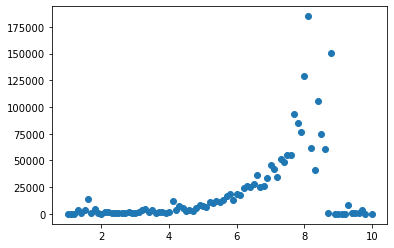

In [886]:
avg_rating = final_merge.groupby('averagerating').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year', 'death_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating['averagerating'], avg_rating_by_genre['numvotes']);


In [887]:
final_merge['numvotes'].mean()


30390.034935440723

In [888]:
total_votes_30000 = final_merge[(final_merge['numvotes'] >= 30000)]

In [889]:
avg_rating = total_votes_30000.groupby('averagerating').mean()
avg_rating.reset_index(inplace=True)

In [890]:
avg_rating.drop(['ordering_x', 'is_original_title', 'birth_year', 'death_year'], 1, inplace=True)

In [891]:
avg_rating.corr()

,averagerating,start_year,runtime_minutes,numvotes
averagerating,1.000000,-0.01377,0.519991,0.576307
start_year,-0.013770,1.00000,0.295680,0.009910
runtime_minutes,0.519991,0.29568,1.000000,0.634711
numvotes,0.576307,0.00991,0.634711,1.000000


In [892]:
final_merge['category']

0           actress
1             actor
2           actress
3            writer
4          director
             ...   
2380443     actress
2380444     actress
2380445       actor
2380446       actor
2380447       actor
Name: category, Length: 2380448, dtype: object